In [1]:
import numpy as np
np.random.seed( 42 )
import string
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

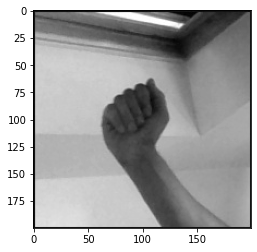

A


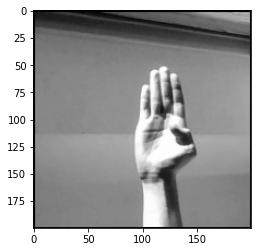

B


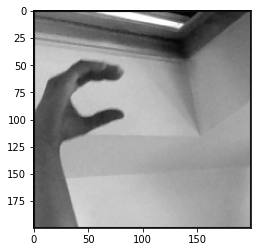

C


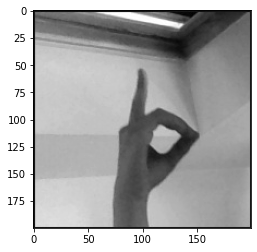

D


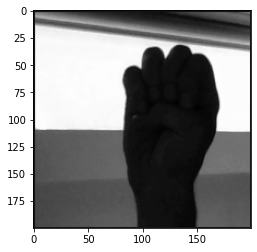

E


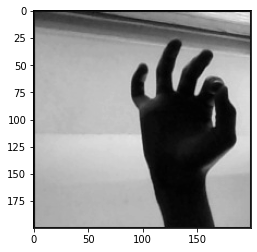

F


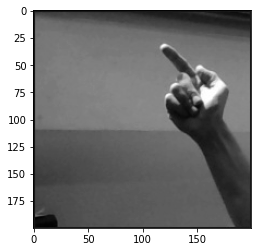

G


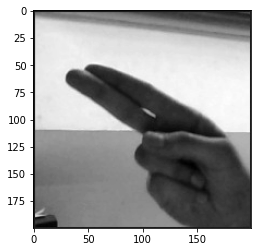

H


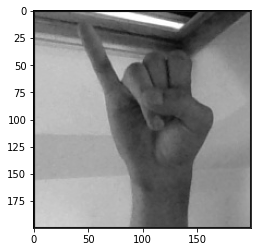

I


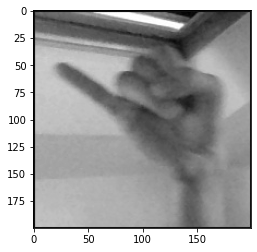

J


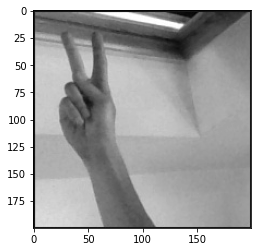

K


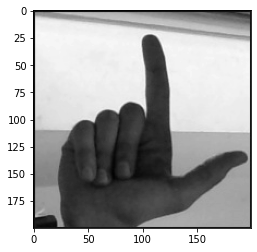

L


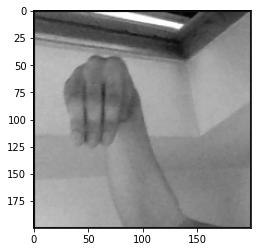

M


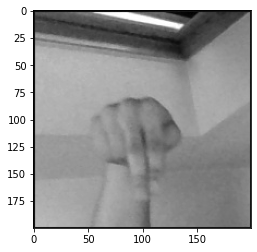

N


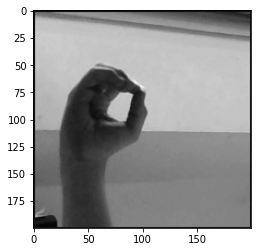

O


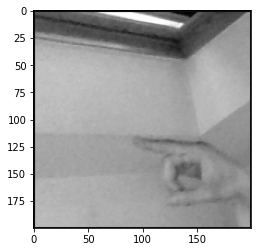

P


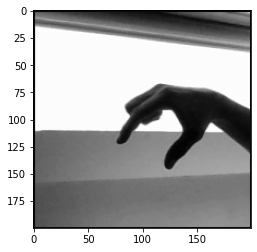

Q


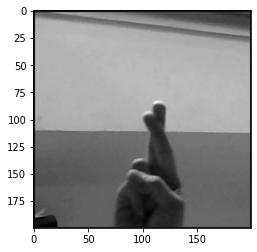

R


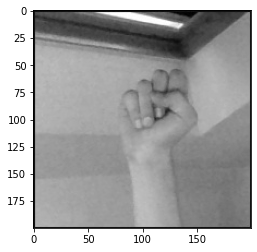

S


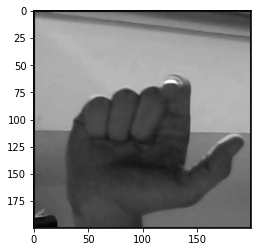

T


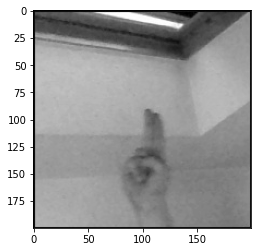

U


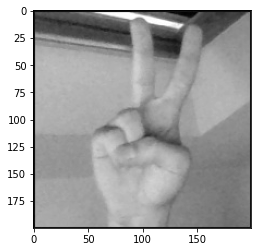

V


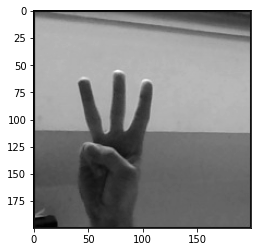

W


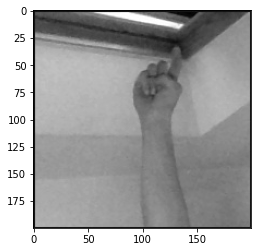

X


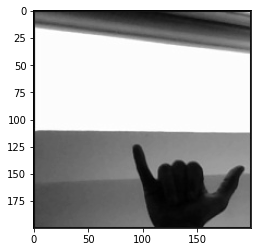

Y


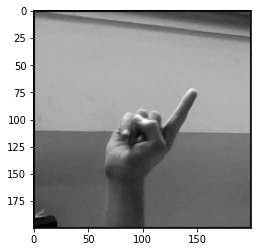

Z


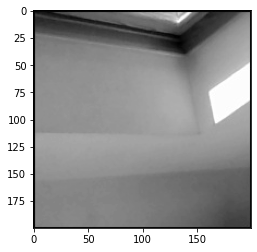

nothing


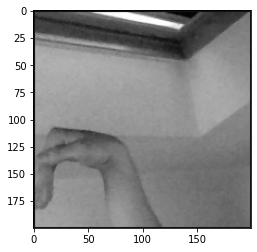

del


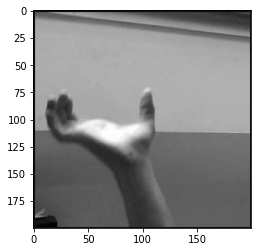

space


In [2]:
train_path="../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
CATEGORIES=list(string.ascii_uppercase)
CATEGORIES.extend(("nothing","del","space"))
#print(CATEGORIES)
for category in CATEGORIES:
  path=os.path.join(train_path,category)
  x=0
  for img in os.listdir(path):
    x+=1
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
    plt.imshow(img_array, cmap='gray')# graph it
    plt.show()  # display!
    if x==1 :
      print(category)
      break

In [3]:
print(len(CATEGORIES))

29


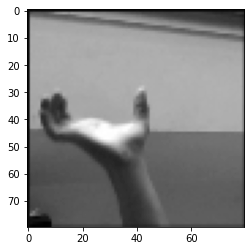

In [4]:
#test size
IMG_SIZE = 80
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
train_data=[]
def create_train_data():
  for category in CATEGORIES:
    path=os.path.join(train_path,category)
    class_num=CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        resize_img=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        train_data.append([resize_img,class_num])
      except Exception as e:
        pass

create_train_data()
print(len(train_data))

100%|██████████| 3000/3000 [00:17<00:00, 174.25it/s]

87000


In [6]:
test_path = "../input/asl-alphabet-test"
def create_test_data():
  for category in CATEGORIES:
    path=os.path.join(test_path,category)
    class_num=CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        resize_img=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        train_data.append([resize_img,class_num])
      except Exception as e:
        pass

create_test_data()
print(len(train_data))

100%|██████████| 30/30 [00:00<00:00, 260.56it/s]

87870


In [7]:
import random
random.shuffle(train_data)
for sample in train_data[:20]:
    print(sample[1])

10
14
19
1
1
4
19
10
4
2
24
0
26
25
26
24
1
16
26
1


In [8]:
x = []
y = []

for features,label in train_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)
x.shape

(87870, 80, 80, 1)

In [9]:
def prep_standardize(x):
	# convert from integers to floats
	x_stan = x.astype('float32')
	# calculate statistics
	m = x_stan.mean()
	s = x_stan.std()
	# center datasets
	x_stan = (x_stan - m) / s
	# return normalized images
	return x_stan

In [10]:
x=prep_standardize(x)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=42)
# print(len(X_train))
# print(len(X_test))


In [ ]:
# def build_model(hp):
#     model = keras.Sequential()
#     model.add(Conv2D(filters=hp.Int("input_units",min_value=32,max_value=256,step=32),
#                             kernel_size=hp.Choice('conv_1_kernel',values = [3,5,7]),
#                             input_shape =(IMG_SIZE,IMG_SIZE,1),
#                             padding='same', data_format='channels_last'))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(4,4),padding='same', data_format='channels_last'))
    
#     for i in range(hp.Int("n_layers_cnn",1,3)):
        
#         model.add(Conv2D(filters=hp.Int(f"conv_{i}_units",min_value=32,max_value=256,step=32),
#                          kernel_size=hp.Choice(f'conv_{i}_kernel',values = [3,5,7]),
#                          padding='same', data_format='channels_last'))
#         model.add(Activation('relu'))
#         model.add(MaxPooling2D(pool_size=(3,3),padding='same', data_format='channels_last'))


#     model.add(Flatten())
    
#     for i in range(hp.Int('num_layers_nn',1,2)):
#         model.add(Dense(units=hp.Int('units_' + str(i),
#                                      min_value=32,
#                                      max_value=700,
#                                      step=32),
#                               activation='relu'))

#     model.add(Dense(29, activation='softmax'))

#     model.compile(optimizer= "adam",
#                   loss= 'sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
    
#     return model


In [ ]:
# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=10,
#     executions_per_trial=10,
#     directory='my_dir',
#     project_name='CNNRS')

# tuner.search_space_summary()


In [ ]:
# tuner.search(X_train, y_train,
#              epochs=10,
#              batch_size=64,
#              validation_data=(X_test, y_test)
#             )

In [18]:
model = keras.Sequential()
model.add(Conv2D(filters=192,kernel_size=7,input_shape =(IMG_SIZE,IMG_SIZE,1),
                   padding='same', data_format='channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4),padding='same', data_format='channels_last'))
    
        
model.add(Conv2D(filters=256,kernel_size=7,
                   padding='same', data_format='channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4),padding='same', data_format='channels_last'))

model.add(Flatten())
model.add(Dense(units=544,activation='relu'))
model.add(Dense(29, activation='softmax'))

model.compile(optimizer= "adam",
                  loss= 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [19]:
history = model.fit(x, y, validation_split=0.005,epochs=25,batch_size=64)

Epoch 1/25
1367/1367 [==============================] - 445s 325ms/step - loss: 1.2013 - accuracy: 0.6491 - val_loss: 0.1719 - val_accuracy: 0.9636
Epoch 2/25
1367/1367 [==============================] - 444s 325ms/step - loss: 0.1179 - accuracy: 0.9629 - val_loss: 0.1336 - val_accuracy: 0.9773
Epoch 3/25
1367/1367 [==============================] - 444s 325ms/step - loss: 0.0621 - accuracy: 0.9810 - val_loss: 0.0390 - val_accuracy: 0.9864
Epoch 4/25
1367/1367 [==============================] - 444s 325ms/step - loss: 0.0625 - accuracy: 0.9816 - val_loss: 0.0780 - val_accuracy: 0.9864
Epoch 5/25
1367/1367 [==============================] - 444s 325ms/step - loss: 0.0391 - accuracy: 0.9893 - val_loss: 0.1061 - val_accuracy: 0.9705
Epoch 6/25
1367/1367 [==============================] - 444s 325ms/step - loss: 0.0430 - accuracy: 0.9885 - val_loss: 0.1508 - val_accuracy: 0.9795
Epoch 7/25
1367/1367 [==============================] - 444s 325ms/step - loss: 0.0307 - accuracy: 0.9922 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


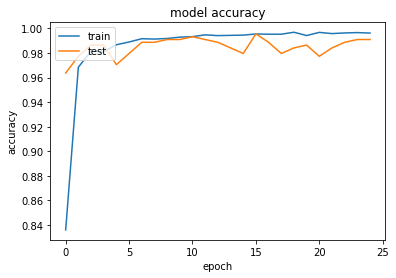

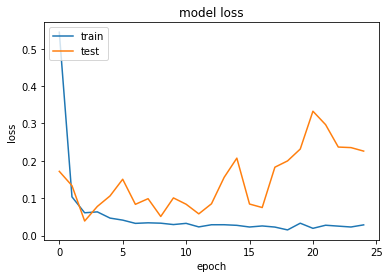

In [24]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
test_path = "../input/asl-alphabet-test"
test_data=[]
def create_test_data():
  for category in CATEGORIES:
    path=os.path.join(test_path,category)
    class_num=CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        resize_img=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        test_data.append([resize_img,class_num])
      except Exception as e:
        pass

create_test_data()
print(len(test_data))

100%|██████████| 30/30 [00:00<00:00, 499.26it/s]

870


In [26]:
x_test = []
y_test = []

for features,label in test_data:
    x_test.append(features)
    y_test.append(label)
x_test = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_test = np.array(y_test)
print(x_test.shape)
# scaling
x_test=prep_standardize(x_test)

(870, 80, 80, 1)


In [27]:
score, acc = model.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

28/28 [==============================] - 4s 153ms/step - loss: 0.5641 - accuracy: 0.9575
Test score: 0.5641182661056519
Test accuracy: 0.9574712514877319


In [42]:
p=model.predict_classes([x_test[0:2]])
p

array([22, 12])

In [29]:
keras_file="Sign_Language_model.h5"
model.save(keras_file)
h5model=tf.keras.models.load_model(keras_file)